In [1]:
# import packages
import numpy as np
import math as math
import pandas as pd
from astropy import units as u
import astropy.constants as const
import random
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set_theme()

# Exploring relationships between planet rotation, obliquity, orbital eccentricity, inclination



### Precession for a given spin freqency

$ \alpha $ - spin-axis precession constant

$ \epsilon $ - obliquity (of orbit?)

Period of planet spin precession
$$ T_{\alpha} = \frac{2\pi}{\alpha ~ cos \epsilon} $$ 

Caused by torque from host star on rotationally-flattened planet 

$$ \alpha = \frac{1}{2}\frac{M_{*}}{m_p}\left(\frac{R_p}{a}\right)^3\frac{k_2}{C}\omega $$




In [2]:
def get_alpha(omega, mstar, mp, rp, a, k2, C):
    """
    Calculate alpha, spin-axis precession constant for frequency of planet 
    rotational spin axis precessing around orbit normal
    
    Input:
        omega: spin frequency
        
    Returns:
        alpha: frequency constant in 1/yr
    """
    alpha = 0.5 * (mstar/mp) * (rp/a)**3 * (k2/C) * omega
    
    return alpha.decompose()

In [3]:
# planet-star parameters
mstar = 1. * u.M_sun
mp = 1. * u.M_earth   # 17 Me Neptune
rp = 1. * u.R_earth   # 4 Re Neptune
a = 1. * u.au  # 30 AU Neptune
k2 = 0.31 # 0.2 * random.random() + 0.2  # Love number, 0.2-0.6 in Solar system
C = 0.33 # 0.2 * random.random() + 0.2 # moment of inertia normalized to planet
Prot = 24. * u.h  # Jupiter spins once every 10 hours, which should be illegal

obl = 23.*np.pi/180. # planet obliquity 

print("Precession for a given spin freqency:")

# Calculate spin frequency 
w = (2*np.pi)/(Prot)
print(f"w = {w.to(1/u.s):.3}")

# Calculate precession constant
alpha = get_alpha(w, mstar, mp, rp, a, k2, C)
print(f"alpha(w) = {alpha:.4}")

# Calculate precession periodt
Ta = (2*np.pi)/(alpha ) #* np.cos(obl))
print(f"T_a = {Ta.to(u.yr):.4} ")  

Precession for a given spin freqency:
w = 7.27e-05 1 / s
alpha(w) = 8.814e-13 1 / s
T_a = 2.259e+05 yr 


The values I get for precession period are about 10x larger than the ones in the paper. 
Unsure why...I suspect units.

### Planet tilt ($\omega$) vs. day length (n)
Obliquity vs. spin frequency

$$ \frac{w_{eq}}{n} = \frac{N(e)}{\Omega(e)}\frac{2cos~\epsilon}{1 + cos^2\epsilon} $$

$ N(e=0) = \Omega(e=0) = 1$

Solving for $\epsilon$ when $w_{eq}/n = 1$:

$$ \epsilon = cos^{-1} \left( \frac{N(e)}{\Omega(e)} \pm  \sqrt{\left( \frac{N(e)}{\Omega(e)}\right) ^2 - 1} ~\right)$$ 

but the part under the radical is complex, so it's actually

$$ \epsilon = cos^{-1} \left( \frac{N(e)}{\Omega(e)}\right) $$

Text(0.5, 1.0, 'Mean rotation rate vs. travel rate for all obliquities @ ecc=0')

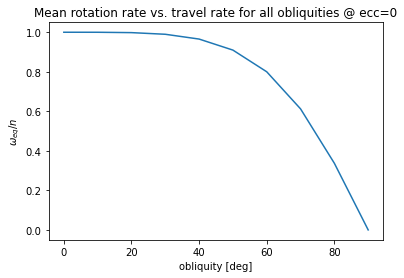

In [4]:
obl = np.arange(0,100,10) * np.pi/180
weq_n = (2 * np.cos(obl)) / (1 + np.cos(obl)**2)

plt.plot(obl*180/np.pi, weq_n)
plt.xlabel("obliquity [deg]")
plt.ylabel(r"$\omega_{eq}/n$")
plt.title("Mean rotation rate vs. travel rate for all obliquities @ ecc=0")

In [134]:
_obl = np.linspace(0,90,100) * np.pi/180
_ecc = np.linspace(0,0.10,100)

obl, ecc = np.meshgrid(_obl, _ecc)

Ne = (1 + (15/2)*ecc**2 + (45/8)*ecc**4 + (5/16)*ecc**6) / (1 - ecc**2)**6
Omegae = (1 + 3*ecc*2 + (3/8)*ecc**4) / (1 - ecc**2)**(9/2)
weq_n =  (2 * np.cos(obl)) / (1 + np.cos(obl)**2) * (Ne / Omegae) 

obl_lock = np.arccos((Ne / Omegae))  # + np.sqrt((Ne/Omegae)**2 - 1)

**Note** The plot has a gradient with increasing eccentricity if you include the 
$\frac{N(e)}{\Omega(e)}$ term in the calculation for $w_{eq}/n$.

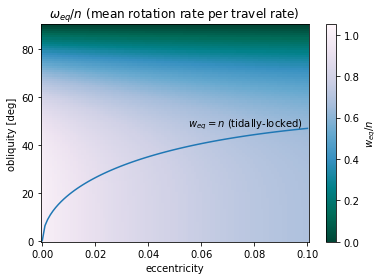

In [139]:
fig, ax = plt.subplots()
plt.grid(False)

pcm = ax.pcolormesh(ecc, obl*(180/np.pi), weq_n, 
                    cmap='PuBuGn_r', vmin=0, vmax=1.05)
plt.plot(np.unique(ecc.flatten()), np.unique((obl_lock.flatten())) * (180/np.pi), '-')

plt.text(0.055, 48, r"$w_{eq} = n$ (tidally-locked)")
plt.xlabel("eccentricity")
plt.ylabel("obliquity [deg]")
plt.title(r"$\omega_{eq}/n$ (mean rotation rate per travel rate) ")
cb = fig.colorbar(pcm)
cb.set_label(r"$w_{eq}/n$")

In [179]:
mass_data = pd.read_table("./ajaa71eft1_mrt.txt", header=70, usecols=[0])
ecc_data = pd.read_table("./ajaa71eft2_mrt.txt", header=28)

In [181]:
ecc_data.to_numpy()

array([['Kepler-9 b/c     2:1 0.0126 0.083 0.001  0.001  0.083  0.001  0.001  0.083 0.001  0.001  0.083  0.001  0.001  '],
       ['Kepler-11 b/c    5:4 0.0113 0.028 0.01   0.006  0.028  0.01   0.006  0.01  0.004  0.008  0.01   0.004  0.008  '],
       ['Kepler-11 c/d    5:3 0.0451 0.013 0.009  0.015  0.001  0.008  0.023  0.001 0.001  0.008  0.00   0.002  0.009  '],
       ['Kepler-11 d/e    7:5 0.0074 0.009 0.001  0.001  0.009  0.002  0.001  0.009 0.001  0.001  0.009  0.001  0.002  '],
       ['Kepler-11 e/f    3:2 0.0272 0.018 0.004  0.005  0.018  0.004  0.006  0.016 0.004  0.005  0.016  0.004  0.004  '],
       ['Kepler-18 c/d    2:1 0.0278 0.001 0.001  0.005  0.001  0.002  0.006  0.002 0.001  0.0004 0.002  0.001  0.001  '],
       ['Kepler-23 b/c    3:2 0.0077 0.017 0.006  0.026  0.025  0.013  0.018  0.011 0.003  0.005  0.011  0.003  0.005  '],
       ['Kepler-23 c/d    7:5 0.0156 0.021 0.014  0.013  0.002  0.018  0.022  0.009 0.009  0.003  0.009  0.011  0.004  '],
       ['Kepler-